In [1]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly==5.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 8.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
from sklearn.model_selection import train_test_split
import os
import urllib
from zipfile import ZipFile

# <mark>**DESCARGA DEL DATASET**</mark>

In [4]:
# Change to a different location if you prefer
dataset_parent_dir = "./data"

# create data folder if it doesnt exist.
os.makedirs(dataset_parent_dir, exist_ok=True)

# download data
download_url = "https://dl.dropboxusercontent.com/scl/fi/398nfciifyodg92yv9dkf/Smoking-and-Drinking-Dataset-with-body-signal.zip?rlkey=by3gynb0cr3lyix1f1b0gb7hs"

# Extract current dataset name from dataset url
dataset_name = os.path.split(download_url)[-1].split(".")[0]
# Get dataset path for later use
dataset_dir = os.path.join(dataset_parent_dir, dataset_name)

INICIO DE LA DESCARGA DEL ARCHIVO

In [5]:
# Get the data zip file path
data_file = os.path.join(dataset_parent_dir, f"{dataset_name}.zip")

# Download the dataset
urllib.request.urlretrieve(download_url, filename=data_file)

('./data/Smoking-and-Drinking-Dataset-with-body-signal.zip',
 <http.client.HTTPMessage at 0x7f49692027a0>)

DESCOMPRIMIR EL ARCHIVO DESCARGADO

In [6]:
# extract files
with ZipFile(data_file, "r") as zip:
    print("extracting files...")
    zip.extractall(path=dataset_parent_dir)
    print("done")

extracting files...
done


ELIMINADO DEL ARCHIVO COMPRESO DESCARGADO

In [7]:
# delete zip file
os.remove(data_file)

# <mark>**Data**</mark>

In [8]:
df = pd.read_csv('./data/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


# <mark>**Descripcion**</mark>

- Sexo Masculino femenino
- edad redondear hasta 5 años
- altura redondear hasta 5 cm[cm]
- peso [kg]
- vista_izquierda vista (izquierda)
- vista_derecha vista (derecha)
- escuchar_izquierda audición izquierda, 1 (normal), 2 (anormal)
- oír_bien audición correcta, 1 (normal), 2 (anormal)
- PAS Presión arterial sistólica [mmHg]
- PAD Presión arterial diastólica [mmHg]
- BLDS BLDS o FSG (glucosa en sangre en ayunas) [mg/dL]
- tot_chole colesterol total[mg/dL]
- HDL_cole Colesterol HDL[mg/dL]
- col_LDL Colesterol LDL[mg/dL]
- triglicérido triglicéridos [mg/dL]
- hemoglobina hemoglobina[g/dL]
- proteína_orina proteína en orina, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- suero de creatinina creatinina sérica (sangre) [mg/dL]
- SGOT_AST Glutamato-oxalacetato transaminasa Aspartato transaminasa [UI/L]
- SGOT_ALT ALT(Alanina transaminasa)[UI/L]
- gamma_GTP y-glutamil transpeptidasa[UI/L]
- SMK_stat_type_cd Estado de fumar, 1 (nunca), 2 (solía fumar pero lo dejó), 3 (todavía fuma)
- DRK_YN Bebedor si o no

# <mark>** Diccionario**</mark>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

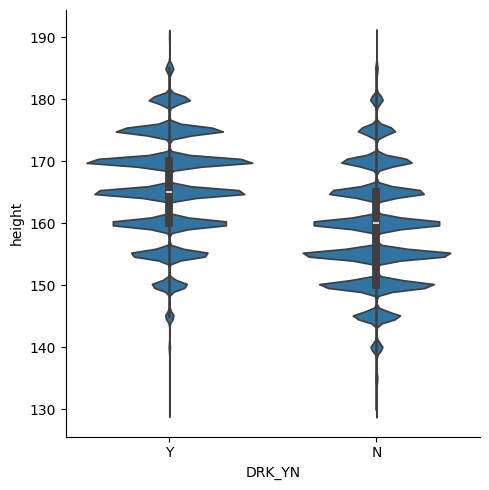

In [6]:
sns.catplot(x="DRK_YN",y="height", data=df,kind="violin")
plt.show()

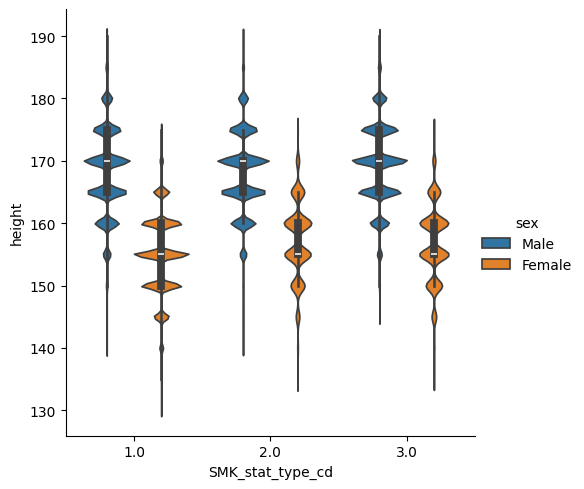

In [7]:
sns.catplot(x="SMK_stat_type_cd",y="height", data=df,kind="violin",hue="sex")
plt.show()

# **Descriptiva**

Codificación 'sex' 0, 1 ; 'DRK_YN' to 0, 1

In [10]:
df.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)
df.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
df.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,0.468990,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,0.499813
std,0.499038,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,0.500000
min,0.000000,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,0.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000
75%,1.000000,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000


# **Distribución**

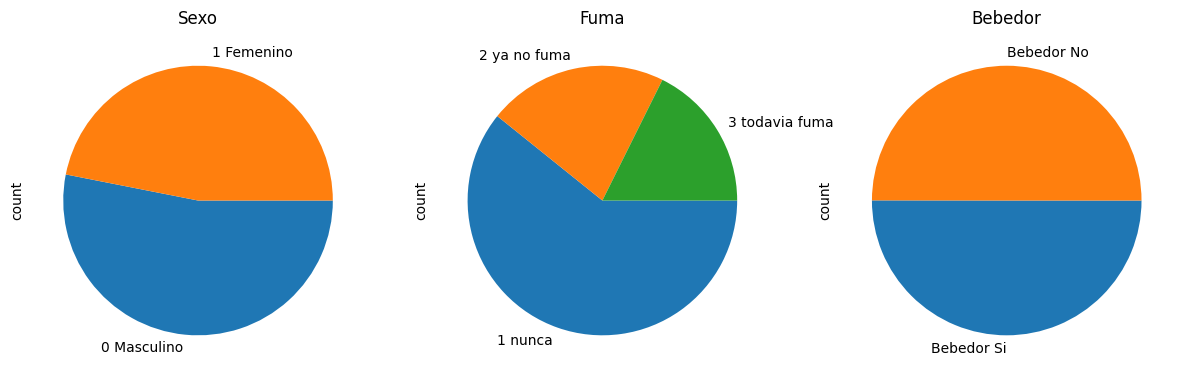

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)    
labels = ['0 Masculino', '1 Femenino']
df['sex'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Sexo')

plt.subplot(1, 4, 2)   
labels = ['1 nunca', '2 ya no fuma', '3 todavia fuma']
df['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Fuma')

plt.subplot(1, 4, 3)    
labels = ['Bebedor Si', 'Bebedor No']
df['DRK_YN'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Bebedor')

plt.show() 

In [12]:
corr = df.corr()
correlacion = corr['DRK_YN'].sort_values(ascending=False)
correlacion_df = pd.DataFrame(correlacion, columns=['DRK_YN'])
correlacion_df

,DRK_YN
DRK_YN,1.000000
height,0.374566
SMK_stat_type_cd,0.350784
hemoglobin,0.299341
weight,0.264282
gamma_GTP,0.205094
triglyceride,0.104398
DBP,0.100876
waistline,0.092993
sight_left,0.077379


In [13]:
corr = df.corr()
correlacion = corr['SMK_stat_type_cd'].sort_values(ascending=False)
correlacion_df = pd.DataFrame(correlacion, columns=['SMK_stat_type_cd'])
correlacion_df

,SMK_stat_type_cd
SMK_stat_type_cd,1.000000
height,0.467317
hemoglobin,0.453385
weight,0.366499
DRK_YN,0.350784
gamma_GTP,0.243576
triglyceride,0.216026
waistline,0.205485
SGOT_ALT,0.131569
serum_creatinine,0.129679


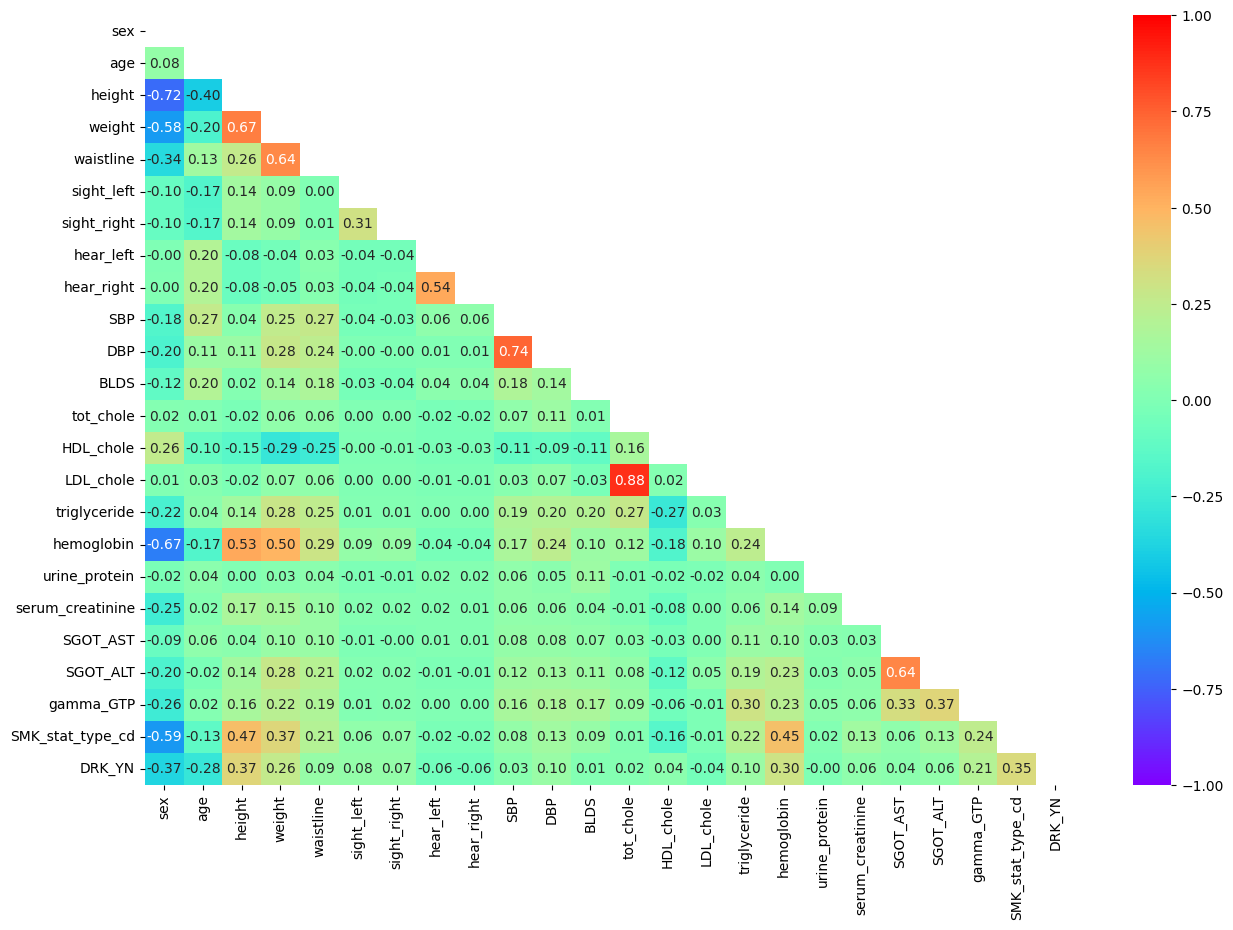

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", mask=mask, cmap="rainbow")
plt.show()

- Este conjunto pertenece al Servicio Nacional de Seguro médico de Corea.
- El propósito de este conjunto de datos es:La clasificación de fumador o bebedor

como primer paso de filtrado de datos se procedio a realizar la eliminacion de los datos que tienen menor numero de correlacion con la columna 'DRK_YN'

In [16]:
df.drop(['age','hear_left', 'hear_right', 'LDL_chole', 'urine_protein', 'HDL_chole', 'sight_left', 'sight_right', 'SBP', 'BLDS', 'tot_chole', 'SGOT_AST'], axis=1, inplace=True)

LUEGO SE PROCEDE A VER SI TIENE VALORES DUPLICADOS EL DATA PARA SU ELIMINACION

In [17]:
df.duplicated().sum()

26

SE PROCEDE A LA ELIMINACION DE DICHOS DATOS

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

LUEGO SE PROCEDE A VERIFICAR SI EXISTEN VALORES NULOS EN LA DATA

In [19]:
df.isnull().sum()

sex                 0
height              0
weight              0
waistline           0
DBP                 0
triglyceride        0
hemoglobin          0
serum_creatinine    0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

CONVERTIMOS LA COLUMNA DE SI FUMA O NO O DE VEZ EN CUANDO EN UNA VARIABLE ENTERA YA QUE ESTA EN FLOTANTE

In [22]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(np.int64)

COMO EL DATA ES MUY GRANDE SE PROCEDIO A REALIZAR UNA PARTICION DEL DATA ORIGINAL A UN 30% YA QUE EN ESA PORCION DE DATA EL AZURE RECIEN REALIZABA EL ENTRENAMIENTO CON LOS MODELOS.

In [20]:
train, df = train_test_split(df, test_size=0.4, random_state=100, shuffle=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396528 entries, 495380 to 27714
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               396528 non-null  int64  
 1   height            396528 non-null  int64  
 2   weight            396528 non-null  int64  
 3   waistline         396528 non-null  float64
 4   DBP               396528 non-null  float64
 5   triglyceride      396528 non-null  float64
 6   hemoglobin        396528 non-null  float64
 7   serum_creatinine  396528 non-null  float64
 8   SGOT_ALT          396528 non-null  float64
 9   gamma_GTP         396528 non-null  float64
 10  SMK_stat_type_cd  396528 non-null  int64  
 11  DRK_YN            396528 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 39.3 MB


POR ULTIMO GUARDAMOS EL DATA PARTICIONADO PARA SU POSTERIOR ENTRENAMIENTO.

In [77]:
df. to_csv ( './data/bebedores_alcohol_compri.csv', index=False, encoding='utf-8')